#### 1 Realize leitura do arquivo CSV disponível em: https://raw.githubusercontent.com/datasets/finance-vix/main/data/vix-daily.csv e atribua a um dataframe.

In [1]:
import csv
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/datasets/finance-vix/main/data/vix-daily.csv")

#### 1.1 Liste as 6 primeiras linhas.

In [3]:
df.head(6)

,DATE,OPEN,HIGH,LOW,CLOSE
0,01/02/1990,17.24,17.24,17.24,17.24
1,01/03/1990,18.19,18.19,18.19,18.19
2,01/04/1990,19.22,19.22,19.22,19.22
3,01/05/1990,20.11,20.11,20.11,20.11
4,01/08/1990,20.26,20.26,20.26,20.26
5,01/09/1990,22.20,22.20,22.20,22.20


#### 1.2 Liste informações básicas sobre o dataset.

In [4]:
print("Informações gerais")
print(df.info())

print("\nContagem de valores vazios")
print(df.isnull().sum())

Informações gerais
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8850 entries, 0 to 8849
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    8850 non-null   object 
 1   OPEN    8850 non-null   float64
 2   HIGH    8850 non-null   float64
 3   LOW     8850 non-null   float64
 4   CLOSE   8850 non-null   float64
dtypes: float64(4), object(1)
memory usage: 345.8+ KB
None

Contagem de valores vazios
DATE     0
OPEN     0
HIGH     0
LOW      0
CLOSE    0
dtype: int64


#### 1.3 Liste as estatísticas básicas do dataframe.

In [5]:
df.describe()

,OPEN,HIGH,LOW,CLOSE
count,8850.000000,8850.000000,8850.000000,8850.000000
mean,19.549688,20.369250,18.784960,19.458788
std,7.908954,8.378376,7.375146,7.834583
min,2.580000,9.310000,8.560000,9.140000
25%,13.910000,14.490000,13.390000,13.830000
50%,17.655000,18.320000,17.005000,17.610000
75%,22.957500,23.810000,22.130000,22.810000
max,82.690000,89.530000,72.760000,82.690000


#### 1.4 Remova linhas com valores ausentes.

In [6]:
# Eu tinha verificado que não havia nenhum valor vazio no dataset, mas o comando para limpar poderia ser o seguinte:
df.dropna(inplace=True)
print(df.isnull().sum())

DATE     0
OPEN     0
HIGH     0
LOW      0
CLOSE    0
dtype: int64


#### 1.5 Converta o tipo da data para datetime.

In [7]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

,DATE,OPEN,HIGH,LOW,CLOSE
0,1990-01-02,17.24,17.24,17.24,17.24
1,1990-01-03,18.19,18.19,18.19,18.19
2,1990-01-04,19.22,19.22,19.22,19.22
3,1990-01-05,20.11,20.11,20.11,20.11
4,1990-01-08,20.26,20.26,20.26,20.26


#### 1.6 Crie uma coluna ‘Volatility Range’ que é derivada das colunas 'HIGH’ menos ‘LOW’.

In [8]:
df['VOLATILITY_RANGE'] = df['HIGH'] - df['LOW']
df[df['VOLATILITY_RANGE'] != 0].head()

,DATE,OPEN,HIGH,LOW,CLOSE,VOLATILITY_RANGE
505,1992-01-02,19.69,20.15,18.88,18.95,1.27
506,1992-01-03,17.04,19.23,17.04,18.75,2.19
507,1992-01-06,16.23,19.49,16.08,18.96,3.41
508,1992-01-07,20.30,20.30,19.12,19.23,1.18
509,1992-01-08,17.53,19.27,17.30,18.72,1.97


#### 1.7 Crie um novo dataframe contendo a média da coluna ‘CLOSE’ agrupada e ordenada por YEAR_MONTH

In [9]:
# Criando coluna YEAR_MONTH
df['YEAR_MONTH'] = df['DATE'].dt.to_period('M')
df.head()

,DATE,OPEN,HIGH,LOW,CLOSE,VOLATILITY_RANGE,YEAR_MONTH
0,1990-01-02,17.24,17.24,17.24,17.24,0.0,1990-01
1,1990-01-03,18.19,18.19,18.19,18.19,0.0,1990-01
2,1990-01-04,19.22,19.22,19.22,19.22,0.0,1990-01
3,1990-01-05,20.11,20.11,20.11,20.11,0.0,1990-01
4,1990-01-08,20.26,20.26,20.26,20.26,0.0,1990-01


In [10]:
serie_close_medio_por_mes = df.groupby('YEAR_MONTH')['CLOSE'].mean()
df_close_medio_por_mes = serie_close_medio_por_mes.reset_index()

# explicitando a ordenação
df_close_medio_por_mes.sort_values(by='YEAR_MONTH', inplace=True)

df_close_medio_por_mes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   YEAR_MONTH  421 non-null    period[M]
 1   CLOSE       421 non-null    float64  
dtypes: float64(1), period[M](1)
memory usage: 6.7 KB


#### 1.8 Crie um gráfico (plot) visual demostrando os dados.

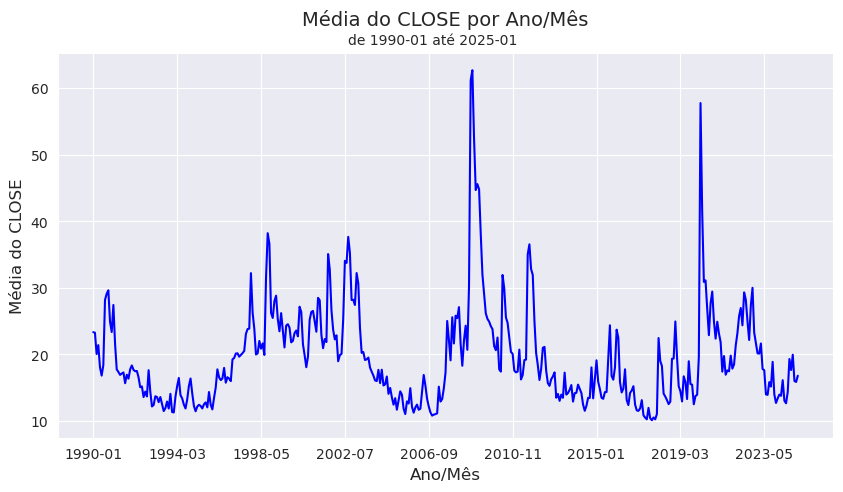

In [11]:
# convertendo o tipo para ser utilizado no gráfico
df_close_medio_por_mes['YEAR_MONTH'] = df_close_medio_por_mes['YEAR_MONTH'].astype(str)

sns.set_style("darkgrid")

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_close_medio_por_mes, x='YEAR_MONTH', y='CLOSE', color='b')

primeiro_YEAR_MONTH = df_close_medio_por_mes['YEAR_MONTH'].iloc[0]
ultimo_YEAR_MONTH = df_close_medio_por_mes['YEAR_MONTH'].iloc[-1]

plt.title('Média do CLOSE por Ano/Mês', fontsize=14, y=1.05)
plt.suptitle(f"de {primeiro_YEAR_MONTH} até {ultimo_YEAR_MONTH}", fontsize=10, y=0.92)

plt.xlabel('Ano/Mês', fontsize=12)
plt.ylabel('Média do CLOSE', fontsize=12)

# evitando sobreposição no xticks
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True, prune='both'))

plt.show()

#### 1.9 Exporte para formato .parquet incluindo no nome do arquivo a data e horário do dia de hoje. Formato prefixo_diamesano_horaminuto Exemplo: finance_251224_1235.parquet

In [12]:
now_to_name = datetime.datetime.now().strftime('%y%m%d_%H%M')
parquet_file_name = f"finance_{now_to_name}.parquet"
df_close_medio_por_mes.to_parquet(parquet_file_name)